In [1]:
import tifffile
import pandas as pd
import joblib as jb
import numpy as np
import matplotlib.pyplot as plt
import ee
import geemap
from pathlib import Path

In [2]:
Map = geemap.Map()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

In [95]:
collection = ee.ImageCollection("COPERNICUS/S2_SR")

In [96]:
feature = Map.draw_last_feature
roi = feature.geometry()

In [128]:
out_dir = '/home/vinicius/Área de Trabalho/Faculdade/2020_1/TCC/download_data/sentinel_data/clip_data'

In [97]:
collection_roi = collection.filterBounds(roi).filterDate('2018-01-01', '2020-01-01').filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE',3)).select(['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8'])

In [98]:
count = collection_roi.size()
print('Count: ', str(count.getInfo())+'\n')

Count:  9



In [133]:
geemap.ee_export_image_collection(collection_roi, out_dir=out_dir, scale=20, file_per_band=True, region=roi)

Total number of images: 9

Exporting 1/9: 20190130T132239_20190130T132233_T22JGS.tif
Generating URL ...
Please wait ...
Data downloaded to /home/vinicius/Área de Trabalho/Faculdade/2020_1/TCC/download_data/sentinel_data/clip_data


Exporting 2/9: 20190415T132241_20190415T132235_T22JGR.tif
Generating URL ...
Please wait ...
Data downloaded to /home/vinicius/Área de Trabalho/Faculdade/2020_1/TCC/download_data/sentinel_data/clip_data


Exporting 3/9: 20190415T132241_20190415T132235_T22JGS.tif
Generating URL ...
Please wait ...
Data downloaded to /home/vinicius/Área de Trabalho/Faculdade/2020_1/TCC/download_data/sentinel_data/clip_data


Exporting 4/9: 20190604T132241_20190604T132926_T22JGR.tif
Generating URL ...
Please wait ...
Data downloaded to /home/vinicius/Área de Trabalho/Faculdade/2020_1/TCC/download_data/sentinel_data/clip_data


Exporting 5/9: 20190604T132241_20190604T132926_T22JGS.tif
Generating URL ...
Please wait ...
Data downloaded to /home/vinicius/Área de Trabalho/Faculdade

In [134]:
input_data = '/home/vinicius/Área de Trabalho/Faculdade/2020_1/TCC/download_data/sentinel_data/20190130T132239_20190130T132233_T22JGS.B7.tif'
tiff = tifffile.TiffFile(input_data)

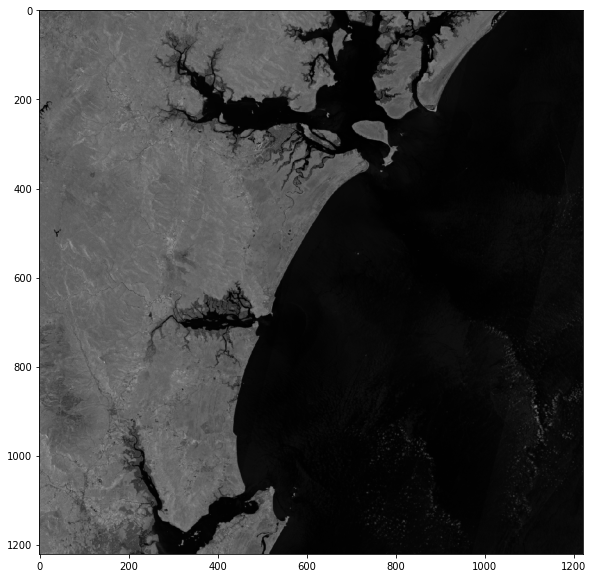

In [135]:
plt.figure(figsize=(18,10))
plt.imshow(tiff.asarray(), 'gray')